# Analysis of Coppen data

In [171]:
coppen_data <- read.csv("coppen_data.csv")
coppen_data <- as.data.frame(lapply(coppen_data, factor))

In [172]:
ftable(X4 + X2 ~ X1+X3, table(coppen_data))

      X4  1     2   
      X2  1  2  1  2
X1 X3               
1  0     25 22 46 27
   1     15 30  9 32
2  0     14  8 47 12
   1     23 22 14 16

In [173]:
library(bnlearn)
source("funs_RCG.R")
ci_test("X1", c("X3", "X4"), test = "mi", data = coppen_data)

cond_indep,test,df
<chr>,<chr>,<chr>
X3 _|_ X1,1.4393,1
X4 _|_ X1 | X3,4.0986,2
Sum,5.5379,3


In [174]:
1-pchisq(5.54, 3)

[1] 0.1362657

In [175]:
ci_test(c("X1", "X2"), "X4", data = coppen_data)

cond_indep,test,df
<chr>,<chr>,<chr>
X4 _|_ X1,0.1056,1
X4 _|_ X2 | X1,3.3599,2
Sum,3.4655,3


In [176]:
1-pchisq(3.4655, 3 )

[1] 0.3252643

It is Markov equivalent to the RCG

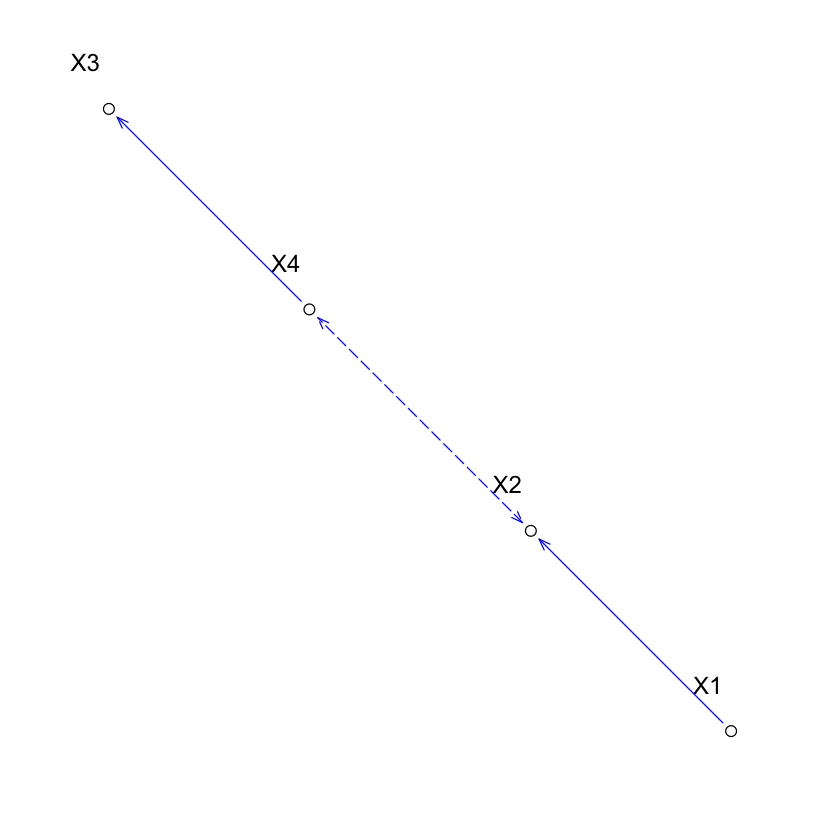

In [177]:
R <- makeMG(bg = UG(~X2*X4), dg = DAG(X2 ~ X1,  X3 ~ X4))
drawGraph(R)